In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read CSV result file generated via bayesian learning run in Colab.

In [10]:
df_result = pd.read_csv('tuning_results_3.csv')

We have 1000 networks sampled from the Bayesian posterior distribution.<br>
N = Minimum number of networks (percentage) we want to agree on the classification of a certain image<br>
P = Probabilty of each of those networks (who agree) predicting that image as that label

In [11]:
df_result[df_result.P == 0.5]

,N,P,Total Images,Skipped Images,Accuracy,Coverage
9,0.95,0.5,339,339,NaN,0.000000
25,0.90,0.5,339,337,0.500000,0.005900
41,0.85,0.5,339,311,0.964286,0.082596
57,0.80,0.5,339,285,0.944444,0.159292
73,0.75,0.5,339,257,0.939024,0.241888
89,0.70,0.5,339,177,0.925926,0.477876
105,0.65,0.5,339,124,0.897674,0.634218
121,0.60,0.5,339,70,0.884758,0.793510
137,0.55,0.5,339,31,0.847403,0.908555
153,0.50,0.5,339,2,0.818991,0.994100


In [12]:
df_result[df_result.N == 0.5]

,N,P,Total Images,Skipped Images,Accuracy,Coverage
144,0.5,0.95,339,85,0.877953,0.749263
145,0.5,0.90,339,71,0.876866,0.790560
146,0.5,0.85,339,55,0.862676,0.837758
147,0.5,0.80,339,44,0.850847,0.870206
148,0.5,0.75,339,35,0.845395,0.896755
149,0.5,0.70,339,31,0.844156,0.908555
150,0.5,0.65,339,25,0.837580,0.926254
151,0.5,0.60,339,16,0.826625,0.952802
152,0.5,0.55,339,10,0.817629,0.970501
153,0.5,0.50,339,2,0.818991,0.994100


Create arrays with the values of the Accuracy and Coverage columns above for visualization purpose

In [5]:
ns = df_result[df_result.P == 0.5]['N'].values
accs2 = df_result[df_result.P == 0.5]['Accuracy'].values
covs2 = df_result[df_result.P == 0.5]['Coverage'].values

In [6]:
ps = df_result[df_result.N == 0.5]['P'].values
accs = df_result[df_result.N == 0.5]['Accuracy'].values
covs =  df_result[df_result.N == 0.5]['Coverage'].values

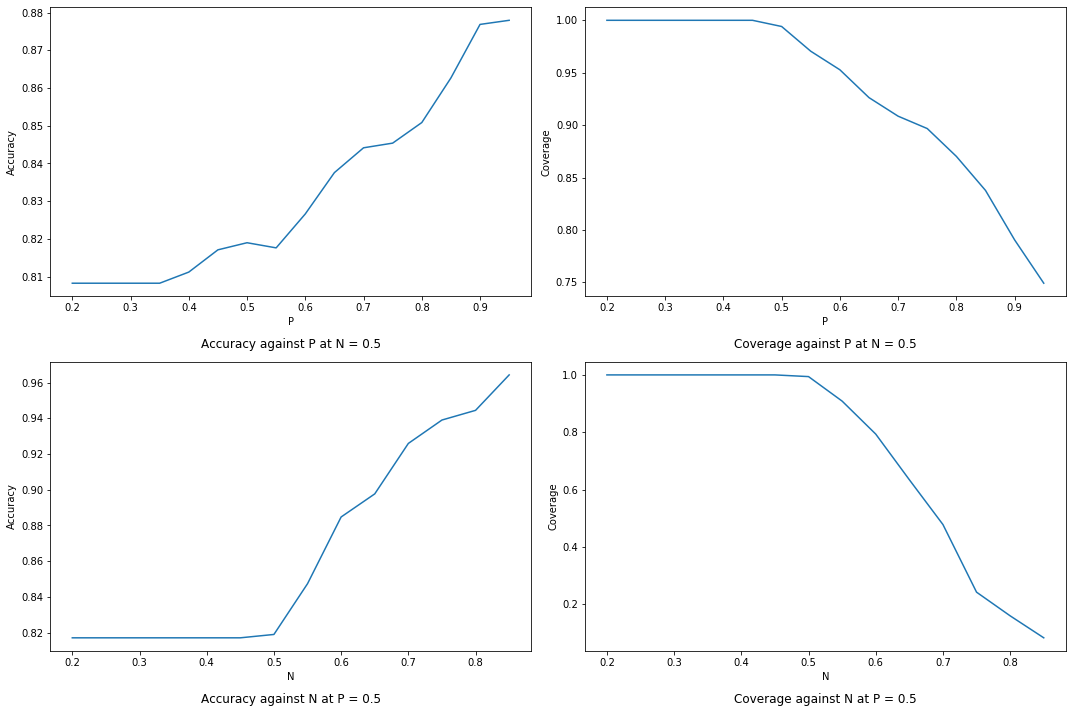

In [8]:
fig = plt.figure(figsize=(15, 10))

ax = fig.subplots(nrows=2, ncols=2)

ax[0][0].plot(ps, accs)
ax[0][0].set_xlabel('P')
ax[0][0].set_ylabel('Accuracy')
ax[0][0].set_title('Accuracy against P at N = 0.5', y=-0.2)

ax[0][1].plot(ps, covs)
ax[0][1].set_xlabel('P')
ax[0][1].set_ylabel('Coverage')
ax[0][1].set_title('Coverage against P at N = 0.5', y=-0.2)

ax[1][0].plot(ns[2:], accs2[2:])
ax[1][0].set_xlabel('N')
ax[1][0].set_ylabel('Accuracy')
ax[1][0].set_title('Accuracy against N at P = 0.5', y=-0.2)

ax[1][1].plot(ns[2:], covs2[2:])
ax[1][1].set_xlabel('N')
ax[1][1].set_ylabel('Coverage')
ax[1][1].set_title('Coverage against N at P = 0.5', y=-0.2)

plt.subplots_adjust(top = 0.99, bottom=0.03, hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.savefig('graph.png')

plt.show()

At constant P, higher values of N lead to higher accuarcy on the images that are predicted, but a lot of images are skipped for prediction (lower coverage).<br>
At constant N, higher values of P lead to higher accuarcy on the images that are predicted, but a lot of images are skipped for prediction (lower coverage).